In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mns
from sklearn import manifold
%matplotlib inline

In [30]:
data = pd.read_csv('test_8i3B3FC.csv')

In [31]:
print(f"Number Of features: {data.shape[1]}")
print(f"Number Of data points: {data.shape[0]}")

Number Of features: 6
Number Of data points: 141448


In [33]:
data.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')

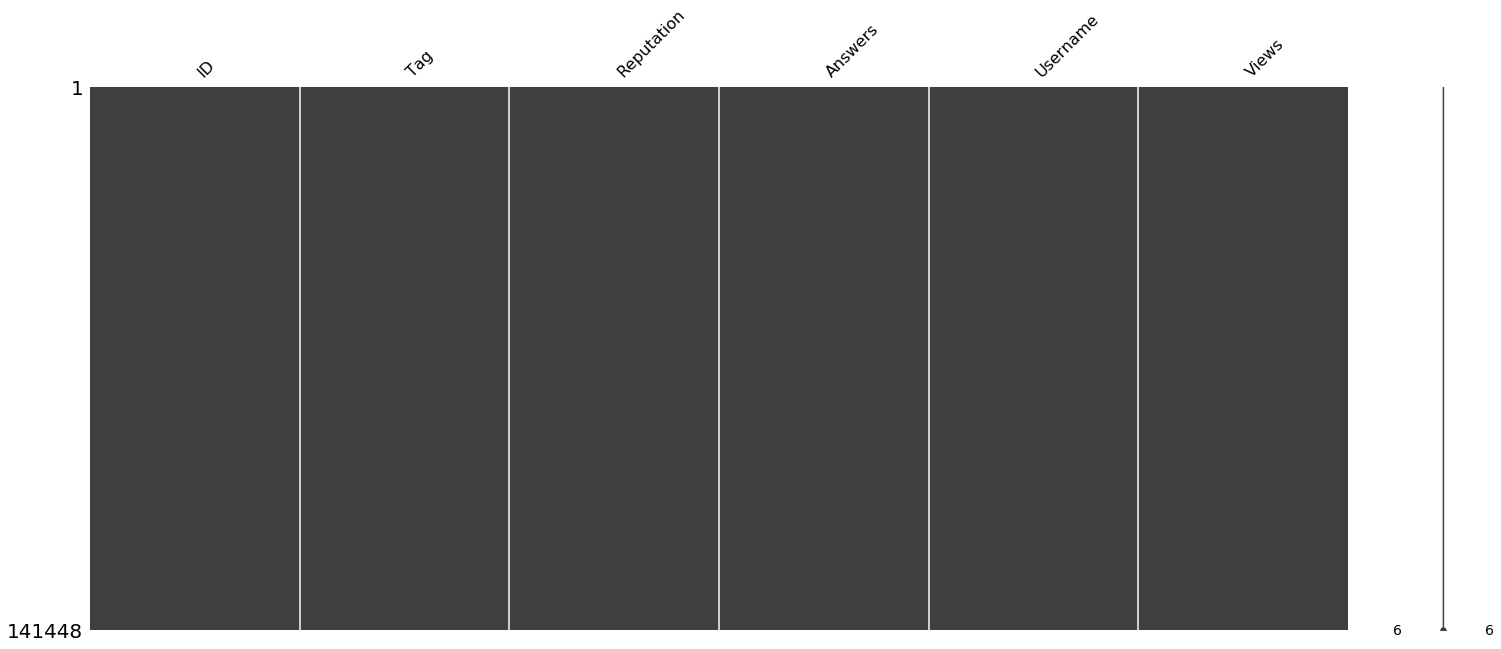

In [34]:
mns.matrix(data)

* No Null Value into data

In [35]:
data.describe()

,ID,Reputation,Answers,Username,Views
count,141448.000000,1.414480e+05,141448.000000,141448.000000,1.414480e+05
mean,235743.073497,7.920927e+03,3.914873,81348.231117,2.984633e+04
std,136269.867118,2.791072e+04,3.577460,49046.098215,8.034374e+04
min,7.000000,0.000000e+00,0.000000,4.000000,9.000000e+00
25%,117797.000000,2.860000e+02,2.000000,40222.750000,2.608000e+03
50%,235830.000000,1.245000e+03,3.000000,78795.500000,8.977000e+03
75%,353616.000000,5.123000e+03,5.000000,122149.000000,2.698925e+04
max,471488.000000,1.042428e+06,73.000000,175737.000000,5.004669e+06


In [36]:
data.head(10)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
5,3514,c,3252.0,1.0,115109,2307.0
6,331420,x,859.0,1.0,88355,6507.0
7,406540,c,770.0,4.0,74489,57775.0
8,227379,s,8727.0,2.0,37904,4459.0
9,331687,p,170.0,4.0,162810,4899.0


### Catagorical Features
* Tag

### Quantitative data
* Reputation
* Answer
* Views

### Target
* Upvotes

In [37]:
data.Tag.unique()

array(['a', 'c', 'i', 'x', 's', 'p', 'o', 'j', 'h', 'r'], dtype=object)

In [38]:
len(data.Username.unique())

79351

Text(0, 0.5, 'Count')

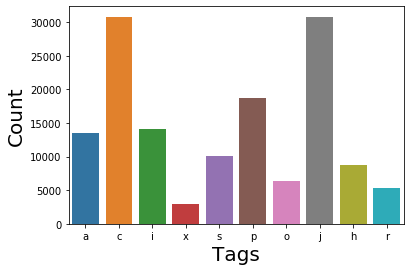

In [39]:
g = sns.countplot(x="Tag",data=data)
g.set_xlabel("Tags",fontsize=20)
g.set_ylabel("Count",fontsize=20)

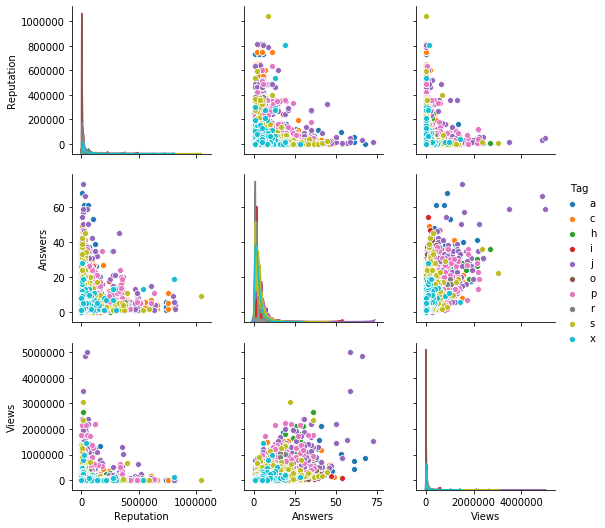

In [46]:
sns.pairplot(data[['Reputation', 'Answers', 'Views','Tag']],hue='Tag', height=2.5)

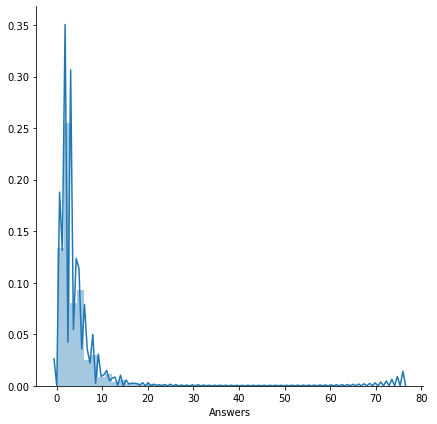

In [11]:
sns.FacetGrid(data, height=6) \
    .map(sns.distplot, "Answers") \
    .add_legend();
plt.show()

In [41]:
data.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')

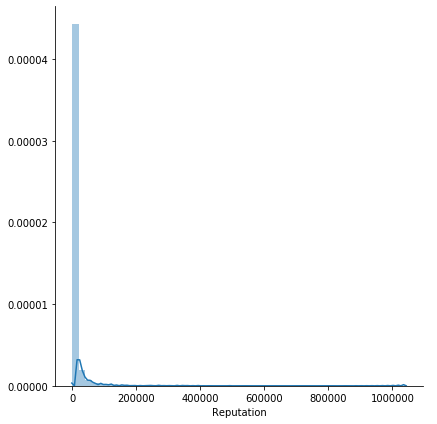

In [17]:
sns.FacetGrid(data, height=6) \
    .map(sns.distplot, "Reputation") \
    .add_legend();
plt.show()

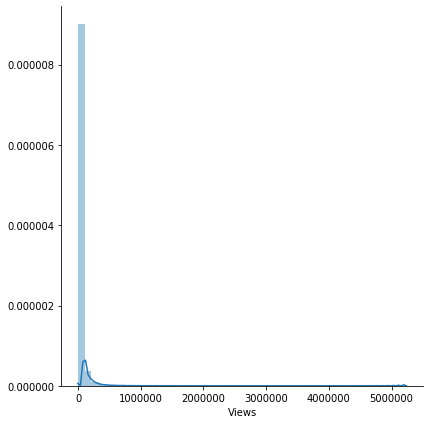

In [18]:
sns.FacetGrid(data, height=6) \
    .map(sns.distplot, "Views") \
    .add_legend();
plt.show()

In [42]:
data['Tag'] = data['Tag'].astype('category')
data["Tag_code"] = data["Tag"].cat.codes
targets = data["Tag_code"].astype(int)
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Tag_code
0,366953,a,5645.0,3.0,50652,33200.0,0
1,71864,c,24511.0,6.0,37685,2730.0,1
2,141692,i,927.0,1.0,135293,21167.0,3
3,316833,i,21.0,6.0,166998,18528.0,3
4,440445,i,4475.0,10.0,53504,57240.0,3


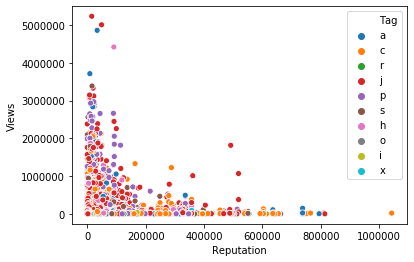

In [21]:
sns.scatterplot(x="Reputation", y="Views", hue="Tag",data=data)

In [23]:
tsne = manifold.TSNE(n_components=2,random_state=42,perplexity=100,n_iter=5000)
n_data = data[:10000]

In [24]:
transformed_data = tsne.fit_transform(n_data[['Reputation', 'Answers', 'Views', 'Upvotes']])

In [25]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:10000])),columns=["x","y","targets"])

In [26]:
tsne_df.head()

,x,y,targets
0,16.312267,7.144297,0.0
1,-31.562315,37.981354,0.0
2,10.580759,14.776351,1.0
3,-60.143055,-14.269515,0.0
4,-19.160858,-38.387733,1.0


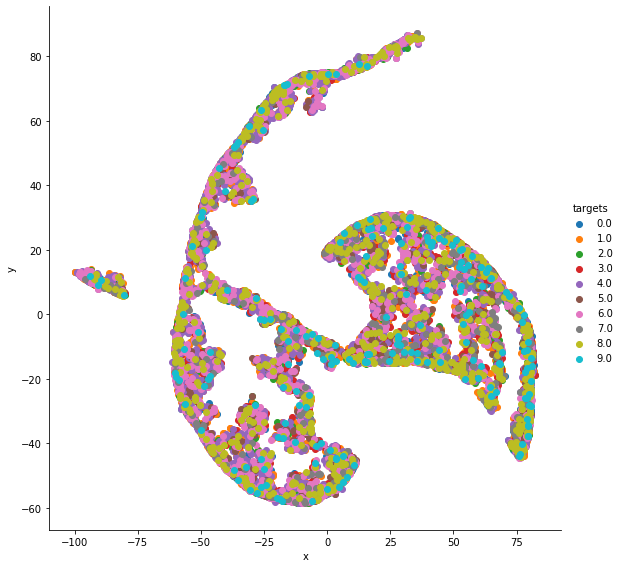

In [27]:
grid = sns.FacetGrid(tsne_df,hue="targets",height=8)
grid.map(plt.scatter,"x","y").add_legend()

In [28]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Tag_code
0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,1


In [43]:
data.to_csv('cleane_test.csv')

In [44]:
sub = pd.read_csv('sample_submission_OR5kZa5.csv')

In [45]:
sub.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500
